In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import logging

In [2]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

In [3]:
train_data = pd.read_csv('C:\\Users\\Abdilala\\Documents\\GitHub\\Data-weak4\\Data\\rossmann-store-sales\\train.csv', low_memory=False)
test_data = pd.read_csv('C:\\Users\\Abdilala\\Documents\\GitHub\\Data-weak4\\Data\\rossmann-store-sales\\test.csv', low_memory=False)

In [4]:
logger.info("Starting data preprocessing.")

2025-01-06 12:37:18,329 - INFO - Starting data preprocessing.


In [6]:
#task 2.1 preprocessing
def preprocess_data(data):
    # Handle NaN values
    data.ffill(inplace=True)  # Forward fill; adjust as necessary

    # Convert 'Date' to datetime
    data['Date'] = pd.to_datetime(data['Date'])

    # Feature extraction
    data['Weekday'] = data['Date'].dt.weekday
    data['Is_Weekend'] = (data['Weekday'] >= 5).astype(int)
    data['Days_to_Holiday'] = data['Date'].apply(lambda x: (pd.to_datetime('2023-12-25') - x).days)
    data['Days_After_Holiday'] = data['Date'].apply(lambda x: (x - pd.to_datetime('2023-12-25')).days if x >= pd.to_datetime('2023-12-25') else 0)
    data['Beginning_of_Month'] = (data['Date'].dt.day <= 10).astype(int)
    data['Mid_of_Month'] = ((data['Date'].dt.day > 10) & (data['Date'].dt.day <= 20)).astype(int)
    data['End_of_Month'] = (data['Date'].dt.day > 20).astype(int)
    data['Month'] = data['Date'].dt.month
    data['Year'] = data['Date'].dt.year

    return data

In [7]:
train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

In [11]:
logger.info("Data preprocessing completed.")

2025-01-06 13:19:06,925 - INFO - Data preprocessing completed.


In [12]:
test_data = test_data.drop(columns=['Id'])

KeyError: "['Id'] not found in axis"

In [13]:
print(test_data.columns.tolist())

['Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Weekday', 'Is_Weekend', 'Days_to_Holiday', 'Days_After_Holiday', 'Beginning_of_Month', 'Mid_of_Month', 'End_of_Month', 'Month', 'Year']


In [14]:
train_data['Date'] = pd.to_datetime(train_data['Date']).apply(lambda x: x.toordinal())
test_data['Date'] = pd.to_datetime(test_data['Date']).apply(lambda x: x.toordinal())

In [15]:
test_data_encod = test_data.copy()

In [16]:
#StateHoliday have catagorical data need to encode into numeric 
test_data = pd.DataFrame({'StateHoliday': [0, 'b', 'c', 'a', 0]})

In [17]:
test_data_encoded = test_data.copy()

In [18]:
holiday_mapping = {
    0: 0,
    'a': 1,
    'b': 2,
   'c': 3
}


In [19]:
# Apply the mapping to both train and test data
train_data['StateHoliday'] = train_data['StateHoliday'].map(holiday_mapping)
#test_data['StateHoliday'] = test_data['StateHoliday'].map(holiday_mapping)
test_data_encoded['StateHoliday'] = test_data_encoded['StateHoliday'].map(holiday_mapping)

In [20]:
print("Original test_data:")
print(test_data)
print("\nEncoded test_data:")
print(test_data_encoded)
print("original data")
print(test_data_encod)

Original test_data:
  StateHoliday
0            0
1            b
2            c
3            a
4            0

Encoded test_data:
   StateHoliday
0             0
1             2
2             3
3             1
4             0
original data
       Store  DayOfWeek    Date  Open  Promo StateHoliday  SchoolHoliday  \
0          1          4  735858   1.0      1            0              0   
1          3          4  735858   1.0      1            0              0   
2          7          4  735858   1.0      1            0              0   
3          8          4  735858   1.0      1            0              0   
4          9          4  735858   1.0      1            0              0   
...      ...        ...     ...   ...    ...          ...            ...   
41083   1111          6  735811   1.0      0            0              0   
41084   1112          6  735811   1.0      0            0              0   
41085   1113          6  735811   1.0      0            0              0   


In [21]:
# Check the results
print("Training Data:")
print(train_data)

print("\nTest Data:")
print(test_data)
print("\nTrain copy")
print(test_data_encod)

Training Data:
         Store  DayOfWeek    Date  Sales  Customers  Open  Promo  \
0            1          5  735810   5263        555     1      1   
1            2          5  735810   6064        625     1      1   
2            3          5  735810   8314        821     1      1   
3            4          5  735810  13995       1498     1      1   
4            5          5  735810   4822        559     1      1   
...        ...        ...     ...    ...        ...   ...    ...   
1017204   1111          2  734869      0          0     0      0   
1017205   1112          2  734869      0          0     0      0   
1017206   1113          2  734869      0          0     0      0   
1017207   1114          2  734869      0          0     0      0   
1017208   1115          2  734869      0          0     0      0   

         StateHoliday  SchoolHoliday  Weekday  Is_Weekend  Days_to_Holiday  \
0                 NaN              1        4           0             3069   
1           

In [22]:
print("Training Data Columns:")
print(train_data.columns.tolist())
print(test_data.columns.tolist())
print(test_data_encoded.columns.tolist())
print(test_data_encod.columns.tolist())

Training Data Columns:
['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Weekday', 'Is_Weekend', 'Days_to_Holiday', 'Days_After_Holiday', 'Beginning_of_Month', 'Mid_of_Month', 'End_of_Month', 'Month', 'Year']
['StateHoliday']
['StateHoliday']
['Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Weekday', 'Is_Weekend', 'Days_to_Holiday', 'Days_After_Holiday', 'Beginning_of_Month', 'Mid_of_Month', 'End_of_Month', 'Month', 'Year']


In [23]:
X_train = train_data.drop(columns=['Sales', 'Customers'])

In [24]:
# Prepare your features and target
X_train = train_data.drop(columns=['Sales', 'Customers'])
y_train = train_data[['Sales', 'Customers']]


In [25]:
X_test = test_data_encod

In [26]:
#Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standard scaling
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))  # Random Forest Regressor
])

In [27]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standard scaling
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))  # Random Forest Regressor
])

In [28]:
#Train the model
logger.info("Training the Random Forest Regressor.")
pipeline.fit(X_train, y_train)

2025-01-06 13:20:28,233 - INFO - Training the Random Forest Regressor.


Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(random_state=42))])

In [29]:
print("X_train columns:", X_train.columns.tolist())
#X_test.drop(columns=['Id'])
print("X_test columns:", X_test.columns.tolist())

X_train columns: ['Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Weekday', 'Is_Weekend', 'Days_to_Holiday', 'Days_After_Holiday', 'Beginning_of_Month', 'Mid_of_Month', 'End_of_Month', 'Month', 'Year']
X_test columns: ['Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Weekday', 'Is_Weekend', 'Days_to_Holiday', 'Days_After_Holiday', 'Beginning_of_Month', 'Mid_of_Month', 'End_of_Month', 'Month', 'Year']


In [30]:
non_numeric_columns = X_test.select_dtypes(include=['object']).columns
print("Non-numeric columns in X_test:", non_numeric_columns)

Non-numeric columns in X_test: Index(['StateHoliday'], dtype='object')


In [31]:
for col in non_numeric_columns:
    print(f"Unique values in {col}:", X_test[col].unique())

Unique values in StateHoliday: ['0' 'a']


In [55]:
#X_test['Customers'] = pd.to_numeric(X_test['Customers'], errors='coerce').fillna(0)

In [32]:
X_test['StateHoliday'] = X_test['StateHoliday'].replace({'a': '1'}) 

In [33]:
#Make predictions
logger.info("Making predictions on the test set.")
y_pred = pipeline.predict(X_test)

2025-01-06 13:37:51,277 - INFO - Making predictions on the test set.


In [34]:
print("Predicted Sales:", y_pred)

Predicted Sales: [[ 5092.01   564.88]
 [ 7122.37   737.27]
 [ 9292.89   974.23]
 ...
 [ 5588.23   589.81]
 [20831.91  3399.52]
 [ 8099.23   564.54]]


In [35]:
# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({
    'Store': test_data_encod['Store'],  # Include relevant identifiers
    'Predicted_Sales': y_pred[:, 0],
    'Predicted_Customers': y_pred[:, 1]
})


In [36]:
# Save to CSV
predictions_df.to_csv('predicted_sales.csv', index=False)

In [37]:
#Make predictions
logger.info("Making predictions on the test set.")
y_pred = pipeline.predict(X_test)

2025-01-06 13:38:26,944 - INFO - Making predictions on the test set.


In [38]:
print("Predicted Sales:", y_pred)

Predicted Sales: [[ 5092.01   564.88]
 [ 7122.37   737.27]
 [ 9292.89   974.23]
 ...
 [ 5588.23   589.81]
 [20831.91  3399.52]
 [ 8099.23   564.54]]


In [45]:
y_true=y_train

In [48]:
y_true_values = y_true[['Sales', 'Customers']]

In [50]:
print(f"Length of true values: {len(y_true_values)}")
print(f"Length of predicted values: {len(predictions_df)}")

Length of true values: 1017209
Length of predicted values: 41088


In [61]:
print("True values:")
print(y_true_values)
print("Predicted values:")
print(predictions_df[['Predicted_Sales', 'Predicted_Customers']])

True values:
         Sales  Customers
0         5263        555
1         6064        625
2         8314        821
3        13995       1498
4         4822        559
...        ...        ...
1017204      0          0
1017205      0          0
1017206      0          0
1017207      0          0
1017208      0          0

[1017209 rows x 2 columns]
Predicted values:
       Predicted_Sales  Predicted_Customers
0              5092.01               564.88
1              7122.37               737.27
2              9292.89               974.23
3              7948.51               851.62
4              7205.91               728.90
...                ...                  ...
41083          2570.73               234.38
41084          6318.28               578.23
41085          5588.23               589.81
41086         20831.91              3399.52
41087          8099.23               564.54

[41088 rows x 2 columns]


In [62]:
if len(y_true_values) == len(predictions_df):
    # Calculate performance metrics using y_true values
    mse_sales = mean_squared_error(y_true_values['Sales'], predictions_df['Predicted_Sales'])
    mse_customers = mean_squared_error(y_true_values['Customers'], predictions_df['Predicted_Customers'])
    print(f'Mean Squared Error for Sales: {mse_sales:.2f}')
    print(f'Mean Squared Error for Customers: {mse_customers:.2f}')
else:
    logger.error("The number of true values does not match the number of predicted values.")
    print("Cannot calculate metrics due to mismatched lengths.")
    

2025-01-06 14:07:40,524 - ERROR - The number of true values does not match the number of predicted values.


Cannot calculate metrics due to mismatched lengths.


In [60]:
from sklearn.metrics import mean_absolute_percentage_error

# Calculate MAPE
mape_score = mean_absolute_percentage_error(y_true, y_pred)  # y_true should be your actual sales values for the test set

logger.info(f"Mean Absolute Percentage Error (MAPE): {mape_score * 100:.2f}%")

ValueError: Found input variables with inconsistent numbers of samples: [1017209, 41088]

In [41]:
#Save the pipeline for future use
import joblib
joblib.dump(pipeline, 'random_forest_model_pipeline.pkl')
logger.info("Pipeline saved as 'random_forest_model_pipeline.pkl'.")

2025-01-06 13:44:33,382 - INFO - Pipeline saved as 'random_forest_model_pipeline.pkl'.


In [65]:
model = pipeline 

In [67]:
import matplotlib.pyplot as plt
import numpy as np

In [71]:
model = pipeline.named_steps['rf']  # Extract the Random Forest model
feature_names = X_train.columns  # Get feature names

In [72]:
# Get feature importances
importances = model.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]

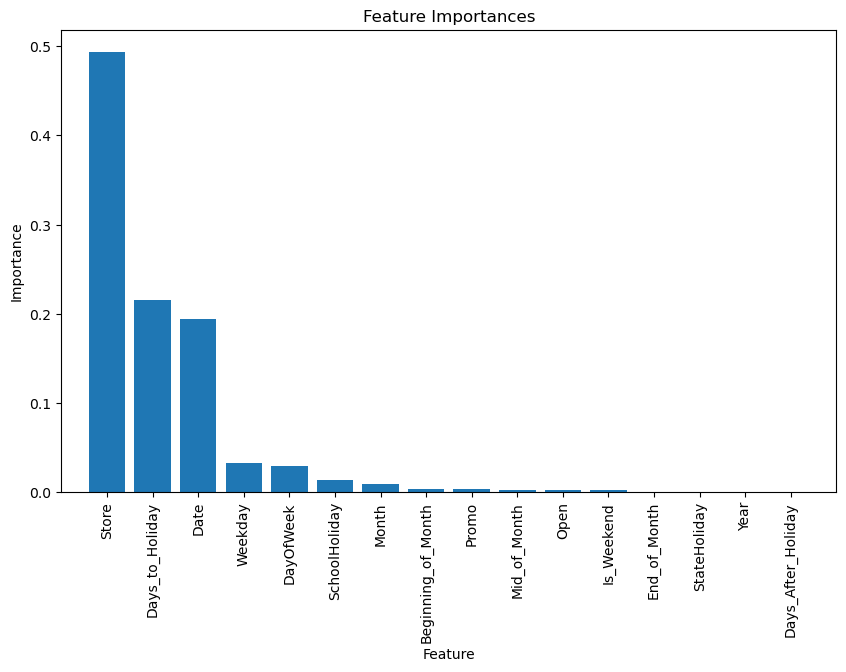

In [73]:
# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

In [69]:
def bootstrap_predictions(model, X, y, n_iterations=1000):
    # Initialize an array to hold the predictions
    predictions = np.zeros((n_iterations, X.shape[0], y.shape[1]))  # Shape (iterations, num_samples, num_outputs)
    
    for i in range(n_iterations):
        # Sample with replacement
        indices = np.random.choice(range(len(X)), size=len(X), replace=True)
        X_bootstrap = X.iloc[indices]
        y_bootstrap = y.iloc[indices]
        
        # Train the model on the bootstrapped sample
        model.fit(X_bootstrap, y_bootstrap)
        
        # Make predictions for the original X
        predictions[i, :, :] = model.predict(X)  # Store predictions in the 3D array

    return predictions


In [70]:
bootstrap_preds = bootstrap_predictions(model, X_test, y_train)

In [74]:
# Calculate confidence intervals for each output
lower_bound_sales = np.percentile(bootstrap_preds[:, :, 0], 2.5, axis=0)  # Sales predictions
upper_bound_sales = np.percentile(bootstrap_preds[:, :, 0], 97.5, axis=0)


In [75]:
lower_bound_customers = np.percentile(bootstrap_preds[:, :, 1], 2.5, axis=0)  # Customers predictions
upper_bound_customers = np.percentile(bootstrap_preds[:, :, 1], 97.5, axis=0)

In [76]:
# Calculate mean predictions for Sales and Customers
mean_predictions_sales = np.mean(bootstrap_preds[:, :, 0], axis=0)  # Mean for Sales
mean_predictions_customers = np.mean(bootstrap_preds[:, :, 1], axis=0)  # Mean for Customers

In [77]:
# Combine predictions and confidence intervals into a DataFrame
predictions_df = pd.DataFrame({
    'Predicted_Sales': mean_predictions_sales,
    'Sales_CI_Lower_Bound': lower_bound_sales,
    'Sales_CI_Upper_Bound': upper_bound_sales,
    'Predicted_Customers': mean_predictions_customers,
    'Customers_CI_Lower_Bound': lower_bound_customers,
    'Customers_CI_Upper_Bound': upper_bound_customers
})

In [78]:
# Display predictions with confidence intervals
print(predictions_df)

       Predicted_Sales  Sales_CI_Lower_Bound  Sales_CI_Upper_Bound  \
0           6558.18655            5287.03000           10927.68125   
1           6849.51402            5598.11025           10935.94925   
2           9283.73496            5581.29675           13563.22950   
3          10381.48464            5273.50950           13824.75500   
4           7862.72752            4930.69025           13602.70500   
...                ...                   ...                   ...   
41083       4758.43096            3700.98550            5620.26675   
41084       4260.84447            3504.17675            5717.49100   
41085       4390.89670            3645.40000            6081.16025   
41086       4778.99856            3638.03400            5660.10825   
41087       6174.71713            4259.19700            7289.83100   

       Predicted_Customers  Customers_CI_Lower_Bound  Customers_CI_Upper_Bound  
0                680.78179                 557.80000                1141.39550

In [79]:
import pickle
import datetime

In [80]:
timestamp = datetime.datetime.now().strftime("%d-%m-%Y-%H-%M-%S-%f")[:-3]  # Get the current time and format it

In [81]:
filename = f"{timestamp}.pkl"

In [82]:
# Serialize the model
with open(filename, 'wb') as file:
    pickle.dump(model, file)


In [83]:
print(f"Model serialized and saved as {filename}")

Model serialized and saved as 06-01-2025-22-21-32-199.pkl
